# 932N1: Financial Derivative: Report

##### Name: KITTIWORAWAT Thanapon
##### Student Identification: 243664 (22115632)
##### Module Convenor: Professor Ding Chen
##### Words Count: ____ (maximum 3,000 words)
##### Due Date: 9th May 2022 16.00 UTC

### Introduction

In [7]:
import csv
import pandas as pd
from pandas import read_csv
import numpy as np
import math
from math import sqrt, pi, log, exp, factorial
import matplotlib.pyplot as plt
from matplotlib import figure
from matplotlib import rcParams as rc
plt.rcParams["figure.figsize"] = (18,12)
import seaborn as sns
import scipy as sc
import scipy.stats as si
from scipy.stats import norm, skew, kurtosis
from scipy.optimize import minimize 
import statsmodels.api as sm
from statsmodels.api import OLS
#!pip install opstrat
import opstrat as op
import yfinance as yf
from __future__ import print_function
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import sympy as sy
from sympy.stats import Normal, cdf
from sympy import init_printing
#!pip install mibian
import mibian
import warnings
warnings.filterwarnings("ignore")

In [8]:
DDTPS = read_csv('GSPC_DDTPS.csv', header=0)
DDTPS.rename(columns = {"Bid_Price_Put":"Put_Bid_Price", "Ask_Price_Put":"Put_Ask_Price"}, inplace = True)
DDTPS

,Strike,Call_Ticker,Call_Bid_Price,Call_Ask_Price,Put_Ticker,Put_Bid_Price,Put_Ask_Price
0,3000,spxg152230000.u,1697.10,1710.50,spxs152230000.u,25.6,26.4
1,3050,spxg152230500.u,1648.90,1662.20,spxs152230500.u,27.3,28.1
2,3100,spxg152231000.u,1603.40,1613.10,spxs152231000.u,29.1,30.0
3,3150,spxg152231500.u,1555.60,1565.20,spxs152231500.u,31.1,32.0
4,3200,spxg152232000.u,1508.00,1517.40,spxs152232000.u,33.2,34.1
...,...,...,...,...,...,...,...
52,5650,spxg152256500.u,4.20,4.80,spxs152256500.u,961.1,973.4
53,5700,spxg152257000.u,3.30,3.90,spxs152257000.u,1010.2,1022.4
54,5750,spxg152257500.u,2.65,3.20,spxs152257500.u,1059.5,1071.8
55,5800,spxg152258000.u,2.15,2.60,spxs152258000.u,1108.8,1121.3


In [3]:
DDTPS.describe(include = "all")

,Strike,Call_Ticker,Call_Bid_Price,Call_Ask_Price,Put_Ticker,Put_Bid_Price,Put_Ask_Price
count,57.000000,57,57.000000,57.000000,57,57.000000,57.000000
unique,NaN,57,NaN,NaN,57,NaN,NaN
top,NaN,spxg152230000.u,NaN,NaN,spxs152230000.u,NaN,NaN
freq,NaN,1,NaN,NaN,1,NaN,NaN
mean,4433.333333,NaN,580.137719,584.432456,NaN,331.261404,334.810526
std,851.434364,NaN,557.125894,560.768563,NaN,335.932438,339.523506
min,3000.000000,NaN,1.450000,1.850000,NaN,25.600000,26.400000
25%,3700.000000,NaN,48.200000,49.300000,NaN,66.000000,67.100000
50%,4450.000000,NaN,418.500000,422.100000,NaN,187.300000,189.000000
75%,5150.000000,NaN,1043.900000,1051.100000,NaN,512.200000,516.100000


##### 1
The attached file “DDTPS.pdf” provides information on an option-based structured security issued by JPMorgan Chase & Co., the Dual Directional Trigger Participation Security (or DDTPS), written on the level of the S&P 500 index, maturing on July 6, 2022. Assuming the date is 6 January 2022. The S&P 500 index closed at 4696.05. The continuously compounded dividend yield of the index is estimated to be 1.70287%.

[Dual Directional Triggered Participation Security Based on the Value of the S&P 500® Index due July 6, 2022](https://jpmorganchaseco.gcs-web.com/static-files/f1a83451-196f-467c-b3ef-da4c5e7d9e64)

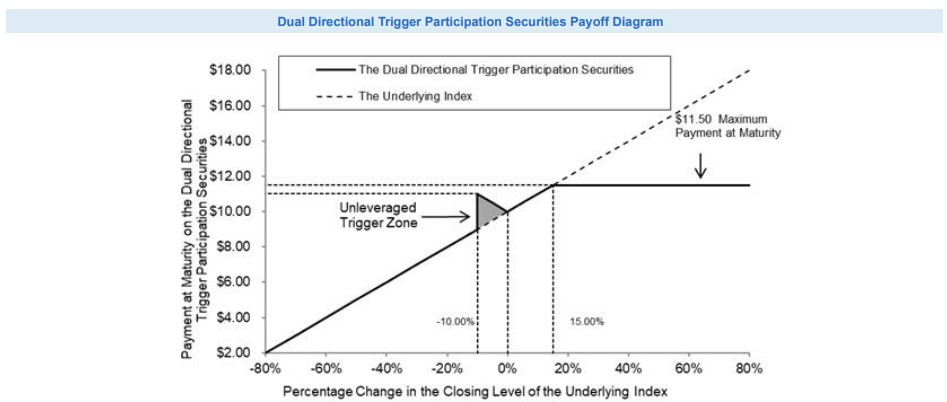

Dual directional structured products' investor participate in return of the index or underlying security (Geng Deng, Tim Dulaney, Tim Husson, Craig McCann, 2013). Typically, dual directional products have unleveraged trigger or leveraged trigger zone which act similarly to a cap: this means investors realised a return to be the same even the underlying security decreases its price down to some certain predetermined level. After this predetermined level, the losses take full magnitude of underlying changes. Figures below demonstrates an example of unleveraged dual directional payoff diagram, leveraged dual directional payoff diagram and single observation with barrier payoff diagram.

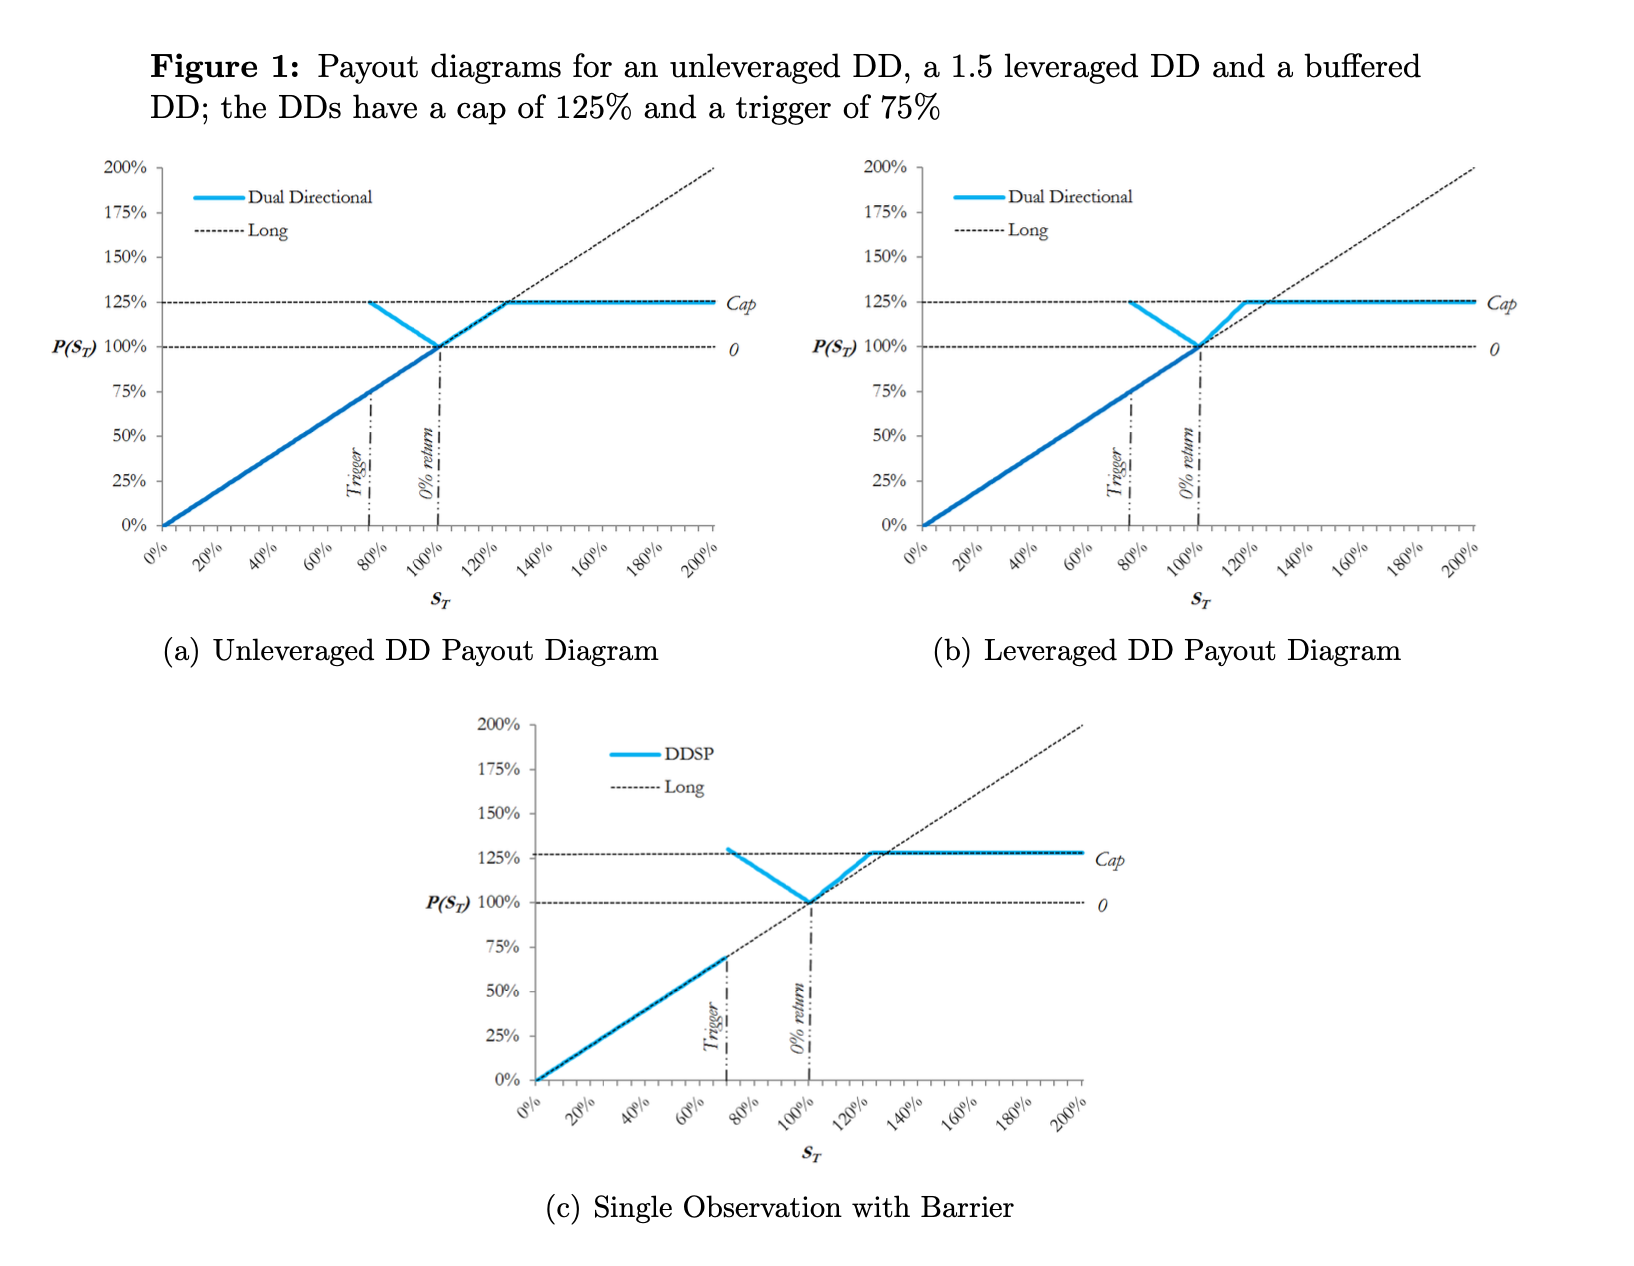

Dual directionals can be considered as single observation (SODDs) or knock-out (KODDs). Single observation dual directionals depends only on underlying asset's value to determine the payoff. Sometimes, single observation dual directionals offer unleveraged/leveraged buffer zone exposure to downside movement of the underlying; however, returns beyond the lower barrier are not to be used to the priciple investment on a one-to-one basis. On the other hand, for knock-out dual directionals have a trigger feature in a manner that if the price movement depreciated beyond the predetermined lower barrier, the possibility of positive return is removed. In comparison, KODDs will be lesser in value than SODDs for identical product. In the payoff diagram, unleveraged and leveraged exposure zone are represented in V-shape region, it denotes the absolute value of return within that narrow range; in turn, investors of such product, if the price of underlying asset or index falls within this region: he/she will receive payment which dependent on the deviation of the underlying price from its initial value (realised volatility). This will benefit investor who is neither bullish or bearish on the particular asset or index. Regarding the thorough detail of dual directional options, they can be decomposed into zero coupon bonds, barrier options, binary options, and European options. In order to determine the appropriate strategy for a particular options, it depends on the particular feature of the product. In general, these options are decomposed into to main categories: knock-out dual directional options and single observation dual directional options. For knock-out dual directionals option, it combined a zero coupon bond with the same time of maturity as the structured product with at least four option positions. 1. long an at-the-money put. 2. short two knock-in puts. 3. long an at-time-money call. and 4. short out-of-the-money call. The knock-in level of the puts structured the lower barrier and the strike price of the out-of-the-money call sets the upper trigger. In order to add a positive buffer leveraged zone, number of call options should be increased proportionally.

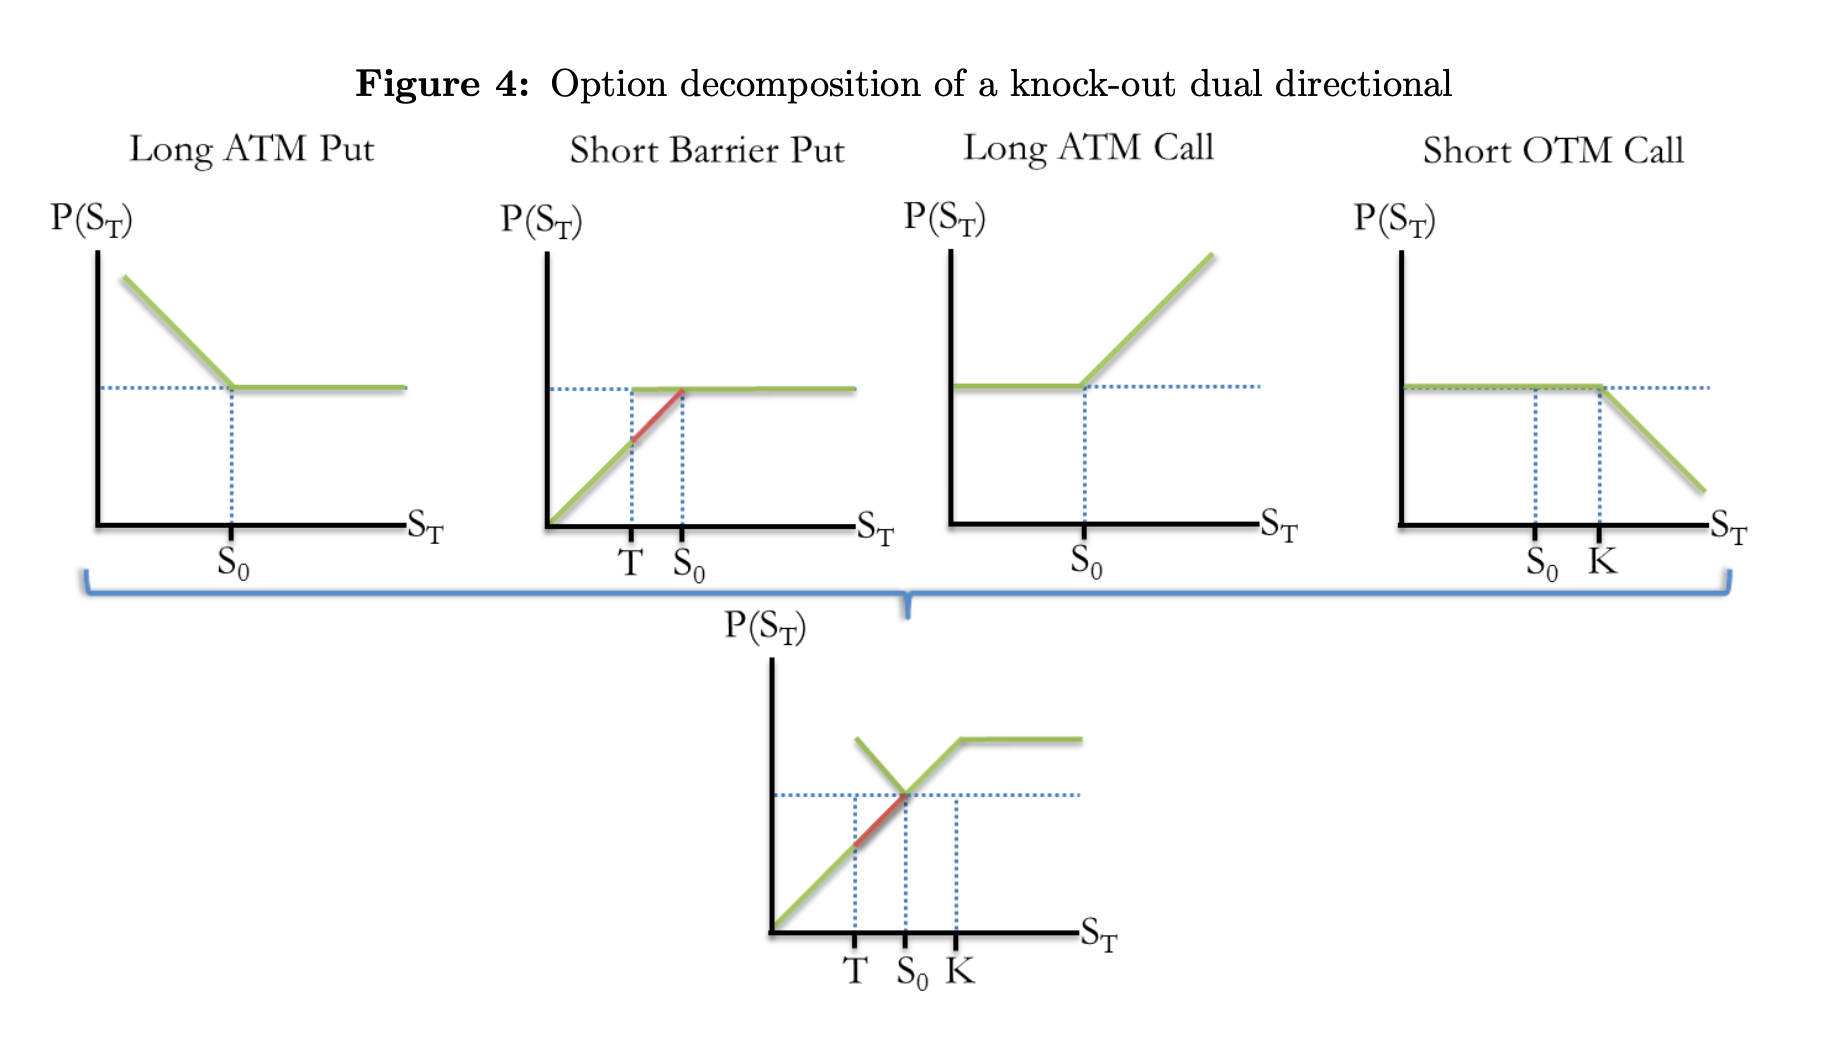

In the meantime, for single observation dual directionals options, it mixed between a zero coupon bond with no less than five option positions. 1. long an at-the-money put. 2. short asset-or-nothing puts. 3. short out-of-the-money puts. 4. long an at-the-money call. 5. short an out-of-the-money call. The asset-or-nothing binary puts contribute the discontinuity between the strike price and the lower boundary of the barrier. Strike price of the out-of-the-money call established the upper trigger. If one wants to construct a structured product that a buffer can be included on the negative returns beyond the trigger level, number of asset-or-nothing needed to be increased. 

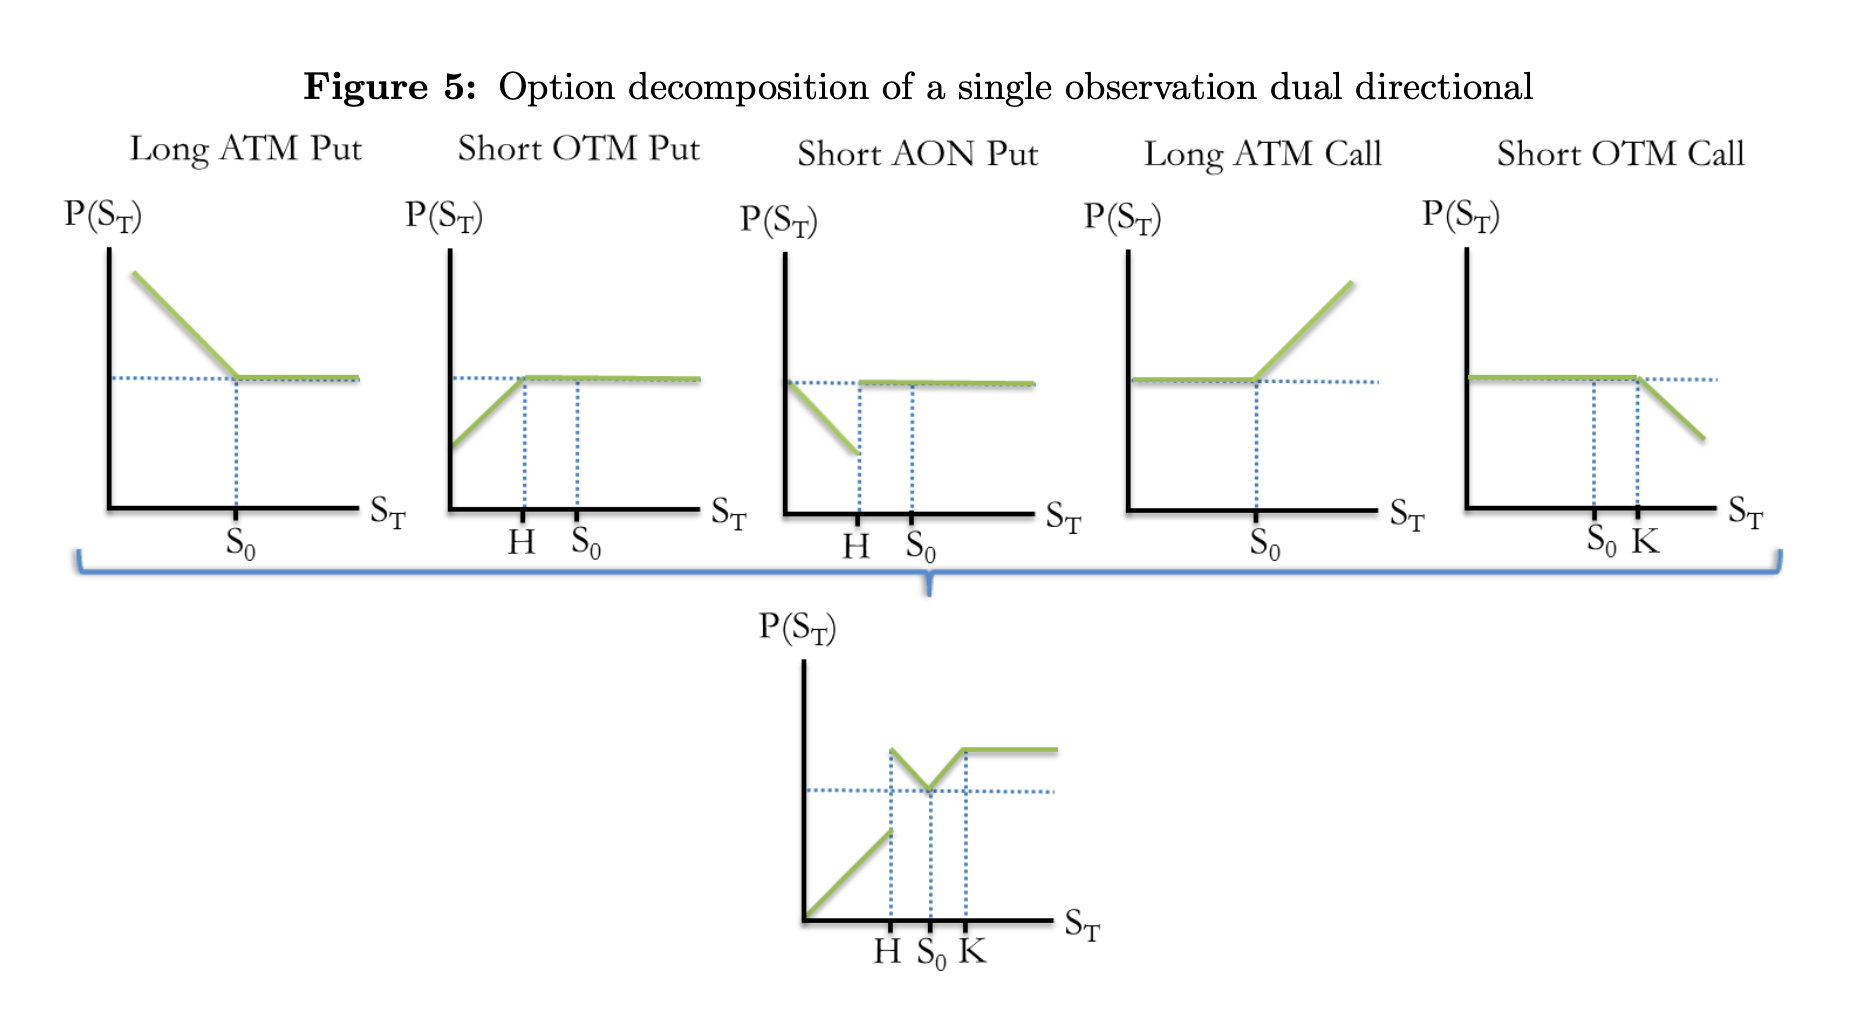

In valuation of dual directionals, there are prerequisite models to be familiar with. The Black Scholes and Merton model with risk neutral assumption and the generalised Brownian motion.

##### A
Empirically, the risk-free rate is often estimated from near-the-money European put and call option pair with the same strike price. Describe how this can be achieved, and calculate the six-month risk-free interest rate, expressed as annualised continuously compounded, using option price data downloaded from Cboe, Bloomberg, or another source.

Call-Put=S_0 e^(-qt)-Ke^(-rt)
Y_i= β_0+ β_1 X_i
Y=contant+Kβ
β=e^(-rt)

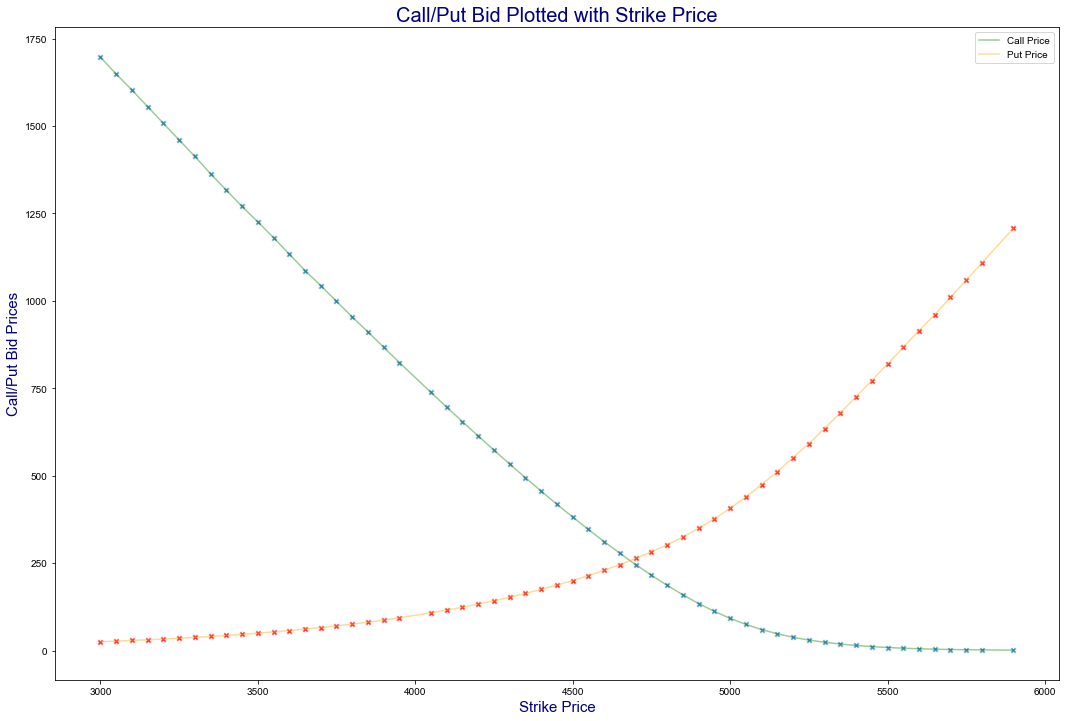

In [9]:
#____________________________________Call and Put Price Relative to Strike Price________________________________

#_______________________________________Visualisation_________________________________________

sns.lineplot(data = DDTPS, x = "Strike", y = "Call_Bid_Price", label = "Call Price", color = "green", alpha = 0.4)
sns.lineplot(data = DDTPS, x = "Strike", y = "Put_Bid_Price", label = "Put Price", color = "orange", alpha = 0.4)
sns.scatterplot(DDTPS.Strike, DDTPS.Call_Bid_Price, marker = "X", alpha = 0.8)
sns.scatterplot(DDTPS.Strike, DDTPS.Put_Bid_Price, marker = "X", alpha = 0.8, color = "red")
plt.title("Call/Put Bid Plotted with Strike Price", color = "navy", fontsize = 20)
plt.xlabel("Strike Price", fontsize = 15, color = "navy")
plt.ylabel("Call/Put Bid Prices", fontsize = 15, color = "navy")
sns.set_style("darkgrid")

Text(0, 0.5, 'Put Bid Price')

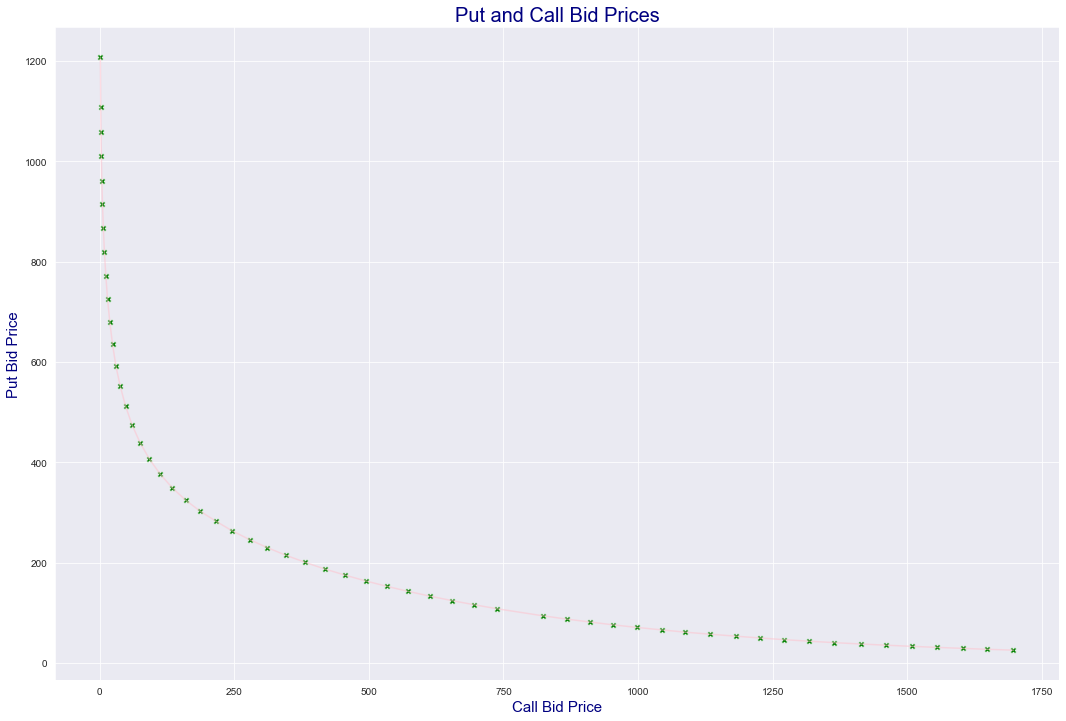

In [10]:
#_________________________________________Put and Call Parity_____________________________________

# C0 + (x*e^-rt) = P0 + S0

call_put = []
for i in range(57):
    c_p = (DDTPS.Call_Bid_Price[i]) - (DDTPS.Put_Bid_Price[i])
    call_put.append(c_p)
    pass
strike = DDTPS.Strike

#_______________________________________Visualisation_________________________________________

sns.lineplot(x = DDTPS.Call_Bid_Price, y = DDTPS.Put_Bid_Price, color = "pink", alpha = 0.5)
sns.scatterplot(x = DDTPS.Call_Bid_Price, y = DDTPS.Put_Bid_Price, marker = "X", color = "green")
plt.title("Put and Call Bid Prices", fontsize = 20, color = "navy")
plt.xlabel("Call Bid Price", fontsize = 15, color = "navy")
plt.ylabel("Put Bid Price", fontsize = 15, color = "navy")

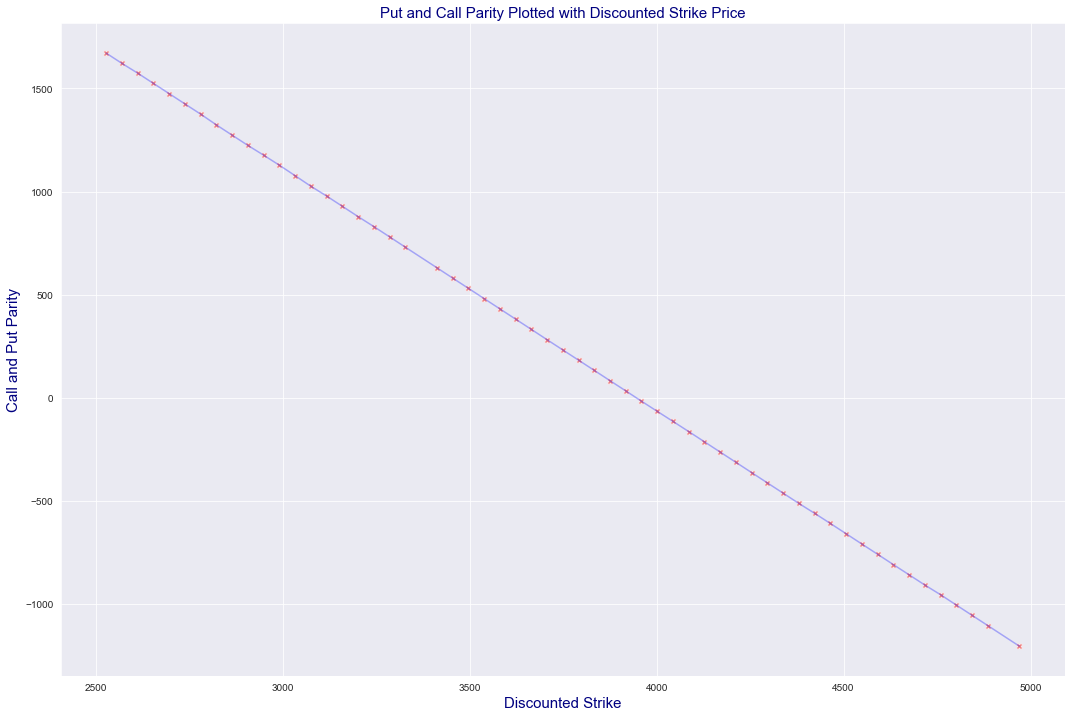

In [13]:
#_________________________Discounted Price Calculation____________________________

d_yield = 0.0170287 #dividend
St = 4696.05 #spot price
t = 1/2 #time to maturity

d = (St-intercept)
risk_free_rate = (math.log(beta/t))/2
r = risk_free_rate

def discounting_strike(strike, r, t):
    discounted_strike = []
    for k in range(57):
        discounted_strikes = strike[k] * (np.exp(-r*t))
        discounted_strike.append(discounted_strikes)
    return discounted_strike

DDTPS["Discounted_Strike"] = discounting_strike(strike, r, t)

#_______________________________________Visualisation_________________________________________

sns.scatterplot(DDTPS.Discounted_Strike, call_put, color = "lightcoral", marker = "X")
sns.lineplot(DDTPS.Discounted_Strike, call_put, color = "blue", alpha = 0.3)
plt.title("Put and Call Parity Plotted with Discounted Strike Price", fontsize = 15, color = "navy")
plt.xlabel("Discounted Strike", fontsize = 15, color = "navy")
plt.ylabel("Call and Put Parity", fontsize = 15, color = "navy")
sns.set_style("darkgrid")

In [14]:
#_____________________________Linear Regression Model Initialisation_______________________________

reg_Y = np.array(call_put)
reg_X = np.array(strike)
reg_X = sm.add_constant(-reg_X)
reg = sm.OLS(reg_Y, reg_X)
regression = reg.fit()
intercept = regression.params[0]
beta = regression.params[1]
risk_free_rate = (-math.log(beta)/t)*100
r = risk_free_rate

#_________________________________Printing Results___________________________________

print("Interception", intercept)
print("Beta", beta)
print("Annual Risk Free Rate", r)
print("Implied Devidend", d)
print(regression.summary())

Interception 4650.958726085885
Beta 0.9929509196157321
Annual Risk Free Rate 1.4148085054675017
Implied Devidend 45.091273914114936
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.400e+07
Date:                Mon, 09 May 2022   Prob (F-statistic):          5.95e-161
Time:                        13:12:46   Log-Likelihood:                -84.514
No. Observations:                  57   AIC:                             173.0
Df Residuals:                      55   BIC:                             177.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

##### B
Assume a money market account is available, providing a constant risk-free rate as calculated in part (a). Vanilla and Exotic options are available for any strike prices on the S&P500. An exchange-traded-fund that perfectly tracks the S&P500 index is also available on the market.Provide two ways to construct the payoff of DDTPS.

1.	Underlying
2.	Bull put spread
3.	Down and out (barrier options)

https://www.investopedia.com/terms/d/daoo.asp#:~:text=What%20Is%20a%20Down%2Dand,reach%20a%20designated%20barrier%20price|
https://www.investopedia.com/terms/b/bullputspread.asp

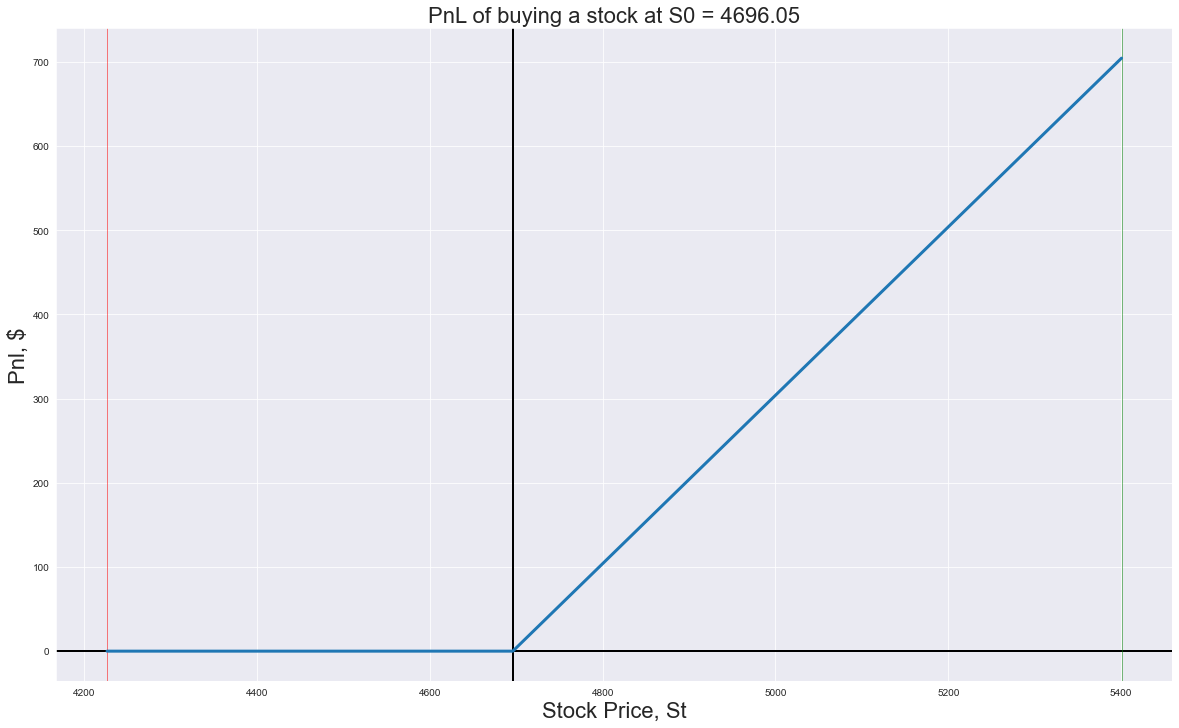

In [16]:
pxs = np.linspace(lower_bound, upper_bound, 41)
pnls = [max(0, s - 4696.05) for s in pxs]

fig, ax1 = plt.subplots(figsize=(20,12))
ax1.axhline(0, color='black', lw = 2)
ax1.axvline(4696.05, color='black', lw = 2)
ax1.axvline(upper_bound, color = "green", alpha = 0.5, lw = 1)
ax1.axvline(lower_bound, color = "red", alpha = 0.5, lw = 1)
ax1.plot(pxs, pnls, lw=3)
ax1.set_title('PnL of buying a stock at S0 = 4696.05', fontsize=22)
ax1.set_xlabel('Stock Price, St', fontsize=22)
ax1.set_ylabel('Pnl, \$', fontsize=22);

In [ ]:
#_____________________________Replicating Options Payoff____________________________

def bull_put_spread():

In [11]:
#__________________________Intialising Parameters________________________________

S0 = 4696.05      # initial stock price
K = 100       # strike price
T = 1/2         # time to maturity in years
H = 90       # up-and-out barrier price/value
r = 0.05      # annual risk-free rate
N = 3         # number of time steps
u = 1.1       # up-factor in binomial models
d = 1/u       # ensure recombining tree
opttype = 'C' # Option Type 'C' or 'P'

#___________________________Barrier Options Slow_________________________________

def barrier_tree_slow(K,T,S0,H,r,N,u,d,opttype='C'):
    #precompute values
    dt = T/N
    q = (np.exp(r*dt) - d)/(u-d)
    disc = np.exp(-r*dt)
    
    # initialise asset prices at maturity
    S = np.zeros(N+1)
    for j in range(0,N+1):
        S[j] = S0 * u**j * d**(N-j)
        
    # option payoff
    C = np.zeros(N+1)
    for j in range(0,N+1):
        if opttype == 'C':
            C[j] = max(0, S[j] - K)
        else:
            C[j] = max(0, K - S[j])
            
    # check terminal condition payoff
    for j in range(0, N+1):
        S = S0 * u**j * d**(N-j)
        if S >= H:
            C[j] = 0
            
    # backward recursion through the tree
    for i in np.arange(N-1,-1,-1):
        for j in range(0,i+1):
            S = S0 * u**j * d**(i-j)
            if S >= H:
                C[j] = 0
            else:
                C[j] = disc * (q*C[j+1]+(1-q)*C[j])
    return C[0]

#_____________________________Barrier Options Fast_______________________________

def barrier_tree_fast(K,T,S0,H,r,N,u,d,opttype='C'):
    #precompute values
    dt = T/N
    q = (np.exp(r*dt) - d)/(u-d)
    disc = np.exp(-r*dt)
    
    # initialise asset prices at maturity
    S = S0 * d**(np.arange(N,-1,-1)) * u**(np.arange(0,N+1,1))
        
    # option payoff
    if opttype == 'C':
        C = np.maximum( S - K, 0 )
    else:
        C = np.maximum( K - S, 0 )
            
    # check terminal condition payoff
    C[S >= H] = 0
            
    # backward recursion through the tree
    for i in np.arange(N-1,-1,-1):
        S = S0 * d**(np.arange(i,-1,-1)) * u**(np.arange(0,i+1,1))
        C[:i+1] = disc * ( q * C[1:i+2] + (1-q) * C[0:i+1] )
        C = C[:-1]
        C[S >= H] = 0
    return C[0]

barrier_tree_fast(K,T,S0,H,r,N,u,d,opttype='C')
barrier_tree_slow(K,T,S0,H,r,N,u,d,opttype='C')
barrier_tree_fast(K,T,S0,H,r,N,u,d,opttype='P')
barrier_tree_slow(K,T,S0,H,r,N,u,d,opttype='P')

0.0

##### C 
Provide a competitive bid and ask price (in USD) for the DDTPS, using the S&P 500 index level and option prices downloaded from Cboe, Bloomberg, or another source. State clearly the price used, the assumptions made, and the modelling framework.

In [15]:
#________________________________________Linear Interpolation__________________________________

St = 4696.05
upper_bound = St*1.15 #15% up to max payoff level
lower_bound = St*0.9 #10% down to the lower bound of the option barrier
p_4200 = DDTPS.loc[DDTPS.Strike == 4200]
p_4250 = DDTPS.loc[DDTPS.Strike == 4250]
c_5400 = DDTPS.loc[DDTPS.Strike == 5400]
c_5450 = DDTPS.loc[DDTPS.Strike == 5450]

p4200_bid = float(p_4200.Put_Bid_Price)
p4250_bid = float(p_4250.Put_Bid_Price)
p4200_ask = float(p_4200.Put_Ask_Price)
p4250_ask = float(p_4250.Put_Ask_Price)
c5400_bid = float(c_5400.Call_Bid_Price)
c5450_bid = float(c_5450.Call_Bid_Price)
c5400_ask = float(c_5400.Call_Ask_Price)
c5450_ask = float(c_5450.Call_Ask_Price)

int_low = float(((lower_bound-(p_4200.Strike))/50))
int_up = float(((upper_bound-(c_5400.Strike))/50))

put_bid = p4200_bid + (p4250_bid - p4200_bid)*int_low
put_ask = p4200_ask + (p4250_ask - p4200_ask)*int_low
call_bid = c5400_bid + (c5450_bid - c5400_bid)*int_up
call_ask = c5400_ask + (c5450_ask - c5400_ask)*int_up

#_________________________________Equivalent Portfolio Theory____________________________________



sum_bid = St - d - call_bid + put_bid
sum_ask = St - d - call_ask + put_ask
DDTPS_bid = (sum_bid*10) / St
DDTPS_ask = (sum_ask*10) / St

#_________________________________Printing Results___________________________________

print("Spot Price = ", St)
print("Barrier Option Lower Bound = ", lower_bound)
print("Barrier Option Upper Bound = ", upper_bound)
print("Put Bid Price at 4226.445 = ", put_bid)
print("Put Ask Price at 4226.445 = ", put_ask)
print("Call Bid Price at 5400.457 = ", call_bid)
print("Call Ask Price at 5400.457 = ", call_ask)
print("Implied Devidend = ", d)
print("Summation of Bid Price = ", sum_bid)
print("Summation of Ask Price = ", sum_ask)
print("DDTPS Option Bid Price = ", DDTPS_bid)
print("DDTPS Option Ask Price = ", DDTPS_ask)

Spot Price =  4696.05
Barrier Option Lower Bound =  4226.445000000001
Barrier Option Upper Bound =  5400.4574999999995
Put Bid Price at 4226.445 =  138.2245500000001
Put Ask Price at 4226.445 =  139.57166000000012
Call Bid Price at 5400.457 =  14.770720000000031
Call Ask Price at 5400.457 =  15.66980500000003
Implied Devidend =  45.091273914114936
Summation of Bid Price =  4774.412556085885
Summation of Ask Price =  4774.860581085885
DDTPS Option Bid Price =  10.166869083774415
DDTPS Option Ask Price =  10.167823130260293


In [16]:
#_________________________Download SP500 Historical Data________________________

gspc = yf.Ticker('^GSPC')
gspc = gspc.history(start='2021-01-01', end='2022-01-01')
gspc["Log_Return"] = np.log(gspc.Close / gspc.Close.shift(1))
gspc = gspc.dropna()

gspc_mean = np.mean(gspc.Log_Return)
gspc_volatility = np.std(gspc.Log_Return)
gspc_variance = gspc.Log_Return.var()
gspc_skew = sc.stats.skew(gspc.Log_Return)
gspc_kur = gspc.Log_Return.kurtosis()

#_________________________________Printing Results___________________________________

print("SP500 Mean Logarithm Return = ", gspc_mean)
print("SP500 Standard Deviation = ", gspc_volatility)
print("SP500 Variance = ", gspc_variance)
print("SP500 Skewness = ", gspc_skew)
print("SP500 Kurtosis = ", gspc_kur)
gspc.describe(include = "all")

SP500 Mean Logarithm Return =  0.001008114457595677
SP500 Standard Deviation =  0.00819574237493275
SP500 Variance =  6.743887384857339e-05
SP500 Skewness =  -0.3708515098711219
SP500 Kurtosis =  0.7889231509149224


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Log_Return
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.0,251.0,251.000000
mean,4273.188882,4293.956822,4253.386658,4275.667450,3.815980e+09,0.0,0.0,0.001008
std,286.121288,284.750900,287.191870,285.722085,1.146262e+09,0.0,0.0,0.008212
min,3698.020020,3737.830078,3694.120117,3714.239990,2.194630e+09,0.0,0.0,-0.026013
25%,4074.640015,4084.824951,4059.144897,4075.924927,3.034085e+09,0.0,0.0,-0.003235
50%,4300.729980,4330.879883,4287.959961,4307.540039,3.471380e+09,0.0,0.0,0.001327
75%,4487.425049,4498.804932,4471.545166,4486.344971,4.476850e+09,0.0,0.0,0.006108
max,4795.490234,4808.930176,4780.040039,4793.060059,9.878040e+09,0.0,0.0,0.023512


Price of DDTPS =  10.086996993776713


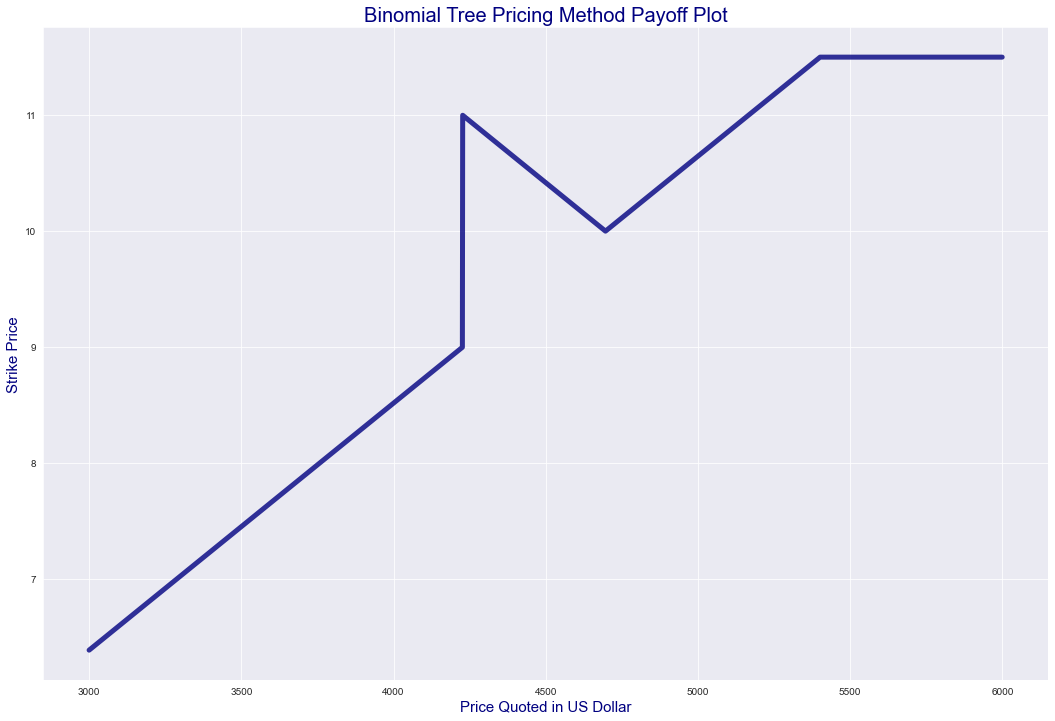

In [24]:
#__________________________Initialising Parameters__________________________

S0 = 4696.05      # initial stock price
K = 95       # strike price
T = 1/2         # time to maturity in years
r = r/100      # annual risk-free rate
n = 126        # number of time steps
div = d_yield
sigma = gspc_volatility

#___________________________Pricing DDTPS_____________________________

class pricing:
    
    def DDTPS(S0, ST):
        DDTPS_payoff = 0
        percentage_change = (ST-S0) /S0
        if ST > S0:
            DDTPS_payoff = 10 * (1+percentage_change)
            if DDTPS_payoff > 11.5:
                DDTPS_payoff = 11.5
        if ST < S0:
            if percentage_change > -0.1:
                DDTPS_payoff = 10 * (1+abs(percentage_change))
            else:
                DDTPS_payoff = 10 * (1+percentage_change)
        return DDTPS_payoff

#_________________________________Binomial Tree_______________________________

    def Binomial_Tree(div, sigma, K, T, n, r, S0, u = None, d = None, mean = None, payoff_func=None):
    
        delta_t = T / n
        u = np.exp(sigma * delta_t**0.5)
        d = 1/u
        q = (np.exp((r - div) * delta_t) - d)/(u-d)
        m = pd.DataFrame(np.zeros(shape=(n + 1, n + 1)))  #hedge ratio
        b = pd.DataFrame(np.zeros(shape=(n + 1, n + 1)))  #money market account amount
        ST = pd.DataFrame(np.zeros(shape=(n + 1, n + 1)))   #create a dataframe for prices
        DDTPS_payoff = pd.DataFrame(np.zeros(shape=(n + 1, n + 1)))    #create a dataframe for payoffs
        value = pd.DataFrame(np.zeros(shape=(n + 1, n + 1)))     #create a dataframe for values
        ST.loc[0][0] = S0
        
#________________________________________Possible Paths______________________________
    
        for a in range(n + 1):
            for c in range(n + 1):
                    ST.loc[a][c] = ST.loc[0][0]*u**(c - a) * d ** a
                    DDTPS_payoff.loc[a][c] = pricing.DDTPS(S0, ST.loc[a][c])
        for a in range(n + 1):
            value[n][a] = DDTPS_payoff[n][a]
            
#___________________________________Defining Discounting Factor____________________________________

        discount_factor = np.exp(-r * delta_t)

        for a in range(1, n):
            for c in range(0, n):
                if c <= n - a:
                    up_value = value.loc[c][n - a + 1]              #up value
                    down_value = value.loc[c + 1][n - a + 1]        #down value
                    
#__________________________________Calculating Prices for Upstate and Downstate____________________________________
                    
                    up_price = ST.loc[c][n - a + 1]           #up prices
                    down_price = ST.loc[c + 1][n - a + 1]     #down prices
                    value.loc[c][n - a] = (q * up_value + (1 - q) * down_value) * discount_factor #value of DDTPs
                    m.loc[c][n - a] = (up_value - down_value) / ((up_price - down_price))
                    b.loc[c][n - a] = np.exp(-r*delta_t)*((u * down_value - d * up_value)/(u-d))

#_______________________________Finding Price at S0_____________________________
        
        up_value0 = value.loc[0][1]
        down_value0 = value.loc[1][1]
        value.loc[0][0] = (q * up_value0 + (1 - q) * down_value0) * discount_factor
        m.loc[0][0] = (up_value0 - down_value0 / ((u - d) * S0))
        b.loc[0][0] = np.exp(-r * delta_t) * ((u * down_value0 - d * up_value0) / (u - d))
        return ST, DDTPS_payoff, value

value = []
ST, DDTPS_payoff, value = pricing.Binomial_Tree(div, sigma, K, T, n, r, S0)
print('Price of DDTPS = ', value[0][0])

#_____________________________________________Visualisation______________________________________________

DDTPS_payoffs = []
ST = np.arange(3000, 6000)
for a in ST:
    DDTPS_payoffs.append(pricing.DDTPS(4696.05, a))
sns.lineplot(ST, DDTPS_payoffs, color = "navy", lw = 5, alpha = 0.8)
plt.title("Binomial Tree Pricing Method Payoff Plot", color = "navy", fontsize = 20)
plt.xlabel("Price Quoted in US Dollar", fontsize = 15, color = "navy")
plt.ylabel("Strike Price", fontsize = 15, color = "navy")
sns.set_style("darkgrid")

##### 2
Continue from Question 1: As the writer of the DDTPS, your employer wishes to know the risk characteristics of the product with respect to future changes in the market.

##### A
Using Black-Scholes formula or basic numerical methods, calculate the Greeks (delta, gamma, vega, theta, rho) for DDTPS, and clearly state your assumptions. Interpret your findings, and provide hedging strategies for the writer of the product.

∆^((V) )  =  ∂V/∂S    (Delta) \
Delta : Measures Impact of a Change in the Price of Underlying \
Γ^((V) )  =  (∂^2 V)/(∂S^2 )    (Gamma) \
Gamma: Measures the Rate of Change of Delta \
ν^((V) )  =  ∂V/∂σ    (Vega) \
Vega: Measures Impact of a Change in Volatility \
Θ^((V) )  = -∂V/∂Τ    (Theta) \
Theta: Measures Impact of a Change in Time Remaining \
ρ^((V) )  =  ∂V/∂r    (Rho) \
Rho: Measures the impact of changes in Interest rates

A well-known method uses to capture market's view of the probability to change in price for a given security is implied volatility. This concept is used to project future movement, supply and demand of a security. Other volatilities measurement such as historical volatility (realised volatility or statistical volatility), local volatility and stochastic volatility capture volatility in different aspect. Meanwhile, implied volatility is yielded from caluclation of the renowned Black Scholes and Merton model (Akhilesh Ganti, 2022).

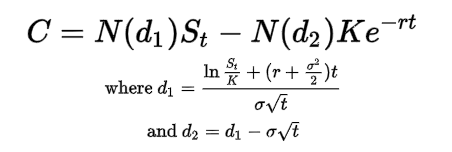

Implied volatility not only predict market movement, but also play a role in pricing security; such that, if options contracts has higher implied volatility, that option will charge higher premiums. The main factors that influence implied volatility are supply, demand and time value. In addition, volatility tends to increase when market is in bear market (downward trend) and decrease when market is in bull market (upward trend). However, implied volatility may not be absolute in predicting the price movement because implied volatility depends solely on prices rather than fundamental factors. Let us take a deeper look into implied volatility. Volatility is denoted by sigma and is often be a proxy of market risk. Sigma is often expressed in percentages and standard deviation over a specified time horizon. Interpreting implied volatility, a period of high implied volatility is said to have large changes in price but implied volatility cannot predict the direction whether the security is going to swing upward or downward. At the same time, a period of low implied volatility means that price movement is going to be subtle and will not make broad or unpredictable changes. In order to price call and put prices by Black Scholes and Merton pricng model, implies volatility estimates the future value of the option as well as the present value of the option. In order to use Black Scholes and Merton model, there are four variable needed: current security price (St), option strike price (K), time until maturity (t), risk-free interest rate (r) and implied volatility (v). According to these variables, American option cannot be priced accurately because American style option can be settled at any time before the maturity time or at the maturity; therefore, time until maturity is varying. Meanwhile, for European style option, Black Scholes and Merton model tends to price these options accurately bacuase the contract cannot be settled before the maturity; therefore, the variable t (time until maturity) is not varying as American options do. There are some mathematic thoery to keep in mind for using Black Scholes and Merton model: risk-neutral pricing, Brownian motion, Itô's lemma, Itô's lemma(1), Itô's lemma(2) and geometric Brownian motion (Roman Paolucci, 2020). Risk-neautral pricing goal is to replicate a temporary risk-less hedged portfolio (no arbitrage assumption). Brownian motion is a continuous time random variable where historical outcomes has no predicting power over future outcomes. Itô's lemma defines stochastic variable in time dependent function and Itô's lemma 1 and 2 consider a multivariable functions. Geometric Brownnian motion is a combination of Brownian motion and Itô's lemma. 

Greeks variables are denoting the sensitivity of option price with aspect to various factors (Macroption, 2022). The option greeks are Delta, Gamma, Theta, Vega, Rho, Volga, Vanna and Charm; however, only Delta, Gamma, Theta, Vega and Rho will be discussed in this report. Variable measures sensitivity in changing in underlying price are Delta and Gamma. Theta measures sensitivity of price with respect to change in time to expiration (time to maturity). Vega captures the sensitivity to change in volatility. For example, when a option portfolio has positive delta, the price action has direct proportional effect to underlying price (if underlying price goes up, option price goes up). In the meantime, for Vega, it has inversely proportional effect to option price: if volatility increases, option price decreases.

Let us take focus onto the greeks. Delta measures how option price will change if the underlying security's price changes by $1$. For call option, delta is ranged from 0 to 1 and for put option delta is ranged from 0 to -1. If the option is at the money, delta is close to 0 and if the option is in the money, delta is close to 1 for call and close to -1 for put. Delta will not be very useful if large changes of price is considered; but for small changes, delta will be accurate. If one portfolio has multiple options, the total of delta is then the sum of each options' delta. Gamma measures the degree in which delta will change corresponding to underlying price changes by $1$. Gamma is highest at the money with passing in time and decreasing in volatility. Positive gamma means your profits accelerate; however, negative gamma means your losses accelerate. Theta measures how much an option's price will change in range of one day. Theta is greatest at the money; increasing volatility will indirectly increase Theta becasue if volatility increase time value; therefore Theta increases. Vega captures how option price will increase or decrease if implied volatility rise by 1 percentage point. The larger time to maturity remaining, the higher Vega. Vega is highest at the money. Rho measures how risk-free interest rate will affect option premium by 1 percentage point. Rho is similar to Vega, has its absolute value greater when time to maturity is more than less. Call options generally have positive Rho and put options have negative Rho. Several underlyings, for example currencies, bonds et cetera, prices may be affected by interest rates and so the options.

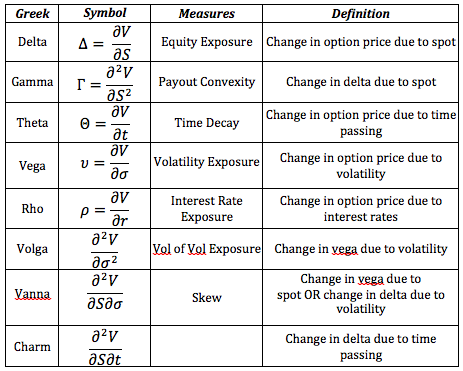

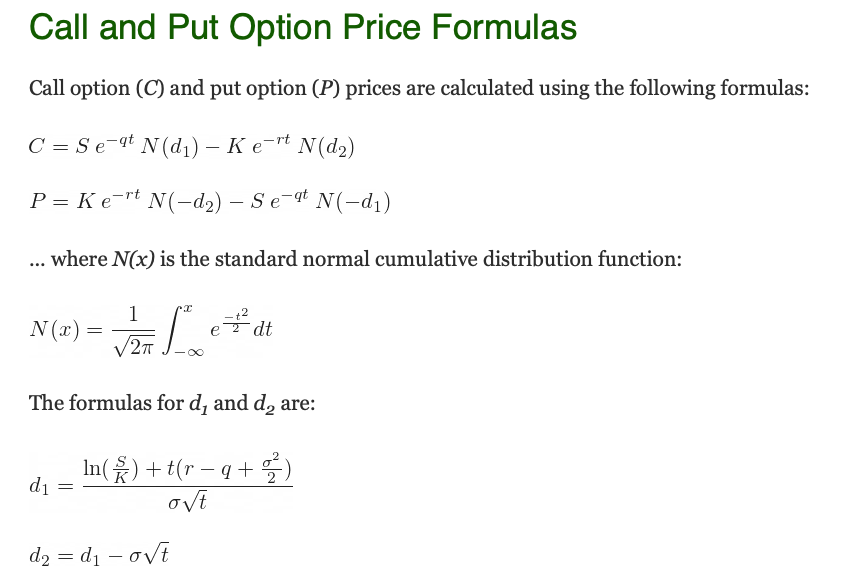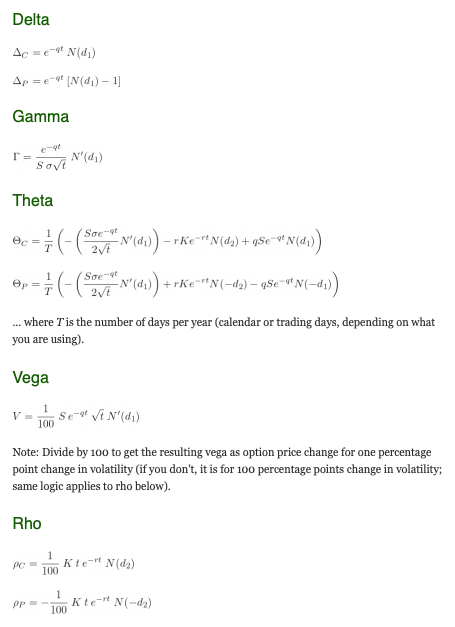

Delta Hedging is an strategy to trade options that aims to lessen the directional risk assciated with the price movements of the underlying security (James Chen, 2021). This strategy uses options to offset the risk of underlying price movements (directionally neutral); this strategy can be done by establishing offsetting long and short positions in the same underlying. By doing so, directional risk is then reduced and is isolating volatility changes for an option traders. 

In [ ]:
#_____________________Black Scholes and Merton Model and the Greeks Formulas________________________

N = norm.cdf
BSM_call = (St*(np.exp(-q*t))*N(d1)) - (K*(np.exp(-r*t))*N(d2))
BSM_put = (K*(np.exp(-r*t)*N(-d2))) - (St*(np.exp(-q*t)*N(-d1)))
d1 = (np.log(St/K) + (t(r-q)+(sigma**2/2))) / (sigma * math.sqrt(t))
d2 = d1 - (sigma * math.sqrt(t))
delta_call = np.exp(-q*t)*N(d1)
delta_put = np.exp(-q*t)*((N(d1))-1)
gamma = ((np.exp(-r*t))/(St*sigma*(math.sqrt(t))))*N(d1)
theta_call = (1/T)*(-(St*q*(np.exp(-q*t))/2*(math.sqrt(t)))*(N(d1))-(r*K*(np.exp(-r*t))*N(d2)+(q*St*(np.exp(-q*t))*N(d1))))
theta_put = (1/T)*(-(St*q*(np.exp(-q*t))/2*(math.sqrt(t)))*(N(d1))+(r*K*(np.exp(-r*t))*N(-d2))-(q*St*(np.exp(-q*t))*N(-d1)))
vega = (1/100)*St*(np.exp(-q*t))*(math.sqrt(t))*N(d1)
rho_call = (1/100)*K*t*(np.exp(-r*t))*N(d2)
rho_put = (1/100)*K*t*(np.exp(-r*t))*N(-d2)

In [18]:
underlying = St
c_strike = upper_bound
p_strike = lower_bound
interest = r
days = 180
c_price = call_bid
p_price = put_bid

#______________________________Calculating Volatility_______________________________

c_vol = mibian.BS([St, c_strike, r, days], callPrice = c_price)
p_vol = mibian.BS([St, p_strike, r, days], putPrice = p_price)
c_volatility = c_vol.impliedVolatility
p_volatility = p_vol.impliedVolatility

#______________________________Calculating Black Scholes and Mertion Model Greeks____________________________

c_greeks = mibian.BS([St, c_strike, r, days], volatility = c_volatility)
p_greeks = mibian.BS([St, p_strike, r, days], volatility = p_volatility)

#_________________________________Printing Results___________________________________

print("Call Implied Volatility = ", c_volatility)
print("Put Implied Volatility = ", p_volatility)
print("Call's Delta = ", c_greeks.callDelta)
print("Call and Put's Gamma = ", c_greeks.gamma)
print("Call's Theta = ", c_greeks.callTheta)
print("Call and Put's Vega = ", c_greeks.vega)
print("Call's Rho = ", c_greeks.callRho)
print("Put's Delta = ", p_greeks.putDelta)
print("Put's Theta = ", p_greeks.putTheta)
print("Put's Rho = ", p_greeks.putRho)
print("Portfolio Call's Delta = ", c_greeks.callDelta/4696.05*0.1)
print("Portfolio Call and Put's Gamma = ", c_greeks.gamma/4696.05*0.1)
print("Portfolio Call's Theta = ", c_greeks.callTheta/4696.05*0.1)
print("Portfolio Call and Put's Vega = ", c_greeks.vega/4696.05*0.1)
print("Portfolio Call's Rho = ", c_greeks.callRho/4696.05*0.1)
print("Portfolio Put's Delta = ", p_greeks.putDelta/4696.05*0.1)
print("Portfolio Put's Theta = ", p_greeks.putTheta/4696.05*0.1)
print("Portfolio Put's Rho = ", p_greeks.putRho/4696.05*0.1)

Call Implied Volatility =  13.484014198184013
Put Implied Volatility =  25.641659274697304
Call's Delta =  0.07666093951246182
Call and Put's Gamma =  0.00032369040722236744
Call's Theta =  -0.1779252375827459
Call and Put's Vega =  4.7467252585744015
Call's Rho =  1.7025183304475673
Put's Delta =  -0.24966722879076336
Put's Theta =  -0.7453925255654482
Put's Rho =  -6.463599486634914
Portfolio Call's Delta =  1.6324557769287343e-06
Portfolio Call and Put's Gamma =  6.892822845207513e-09
Portfolio Call's Theta =  -3.7888275802588534e-06
Portfolio Call and Put's Vega =  0.0001010791038974117
Portfolio Call's Rho =  3.6254263273337534e-05
Portfolio Put's Delta =  -5.316536850986752e-06
Portfolio Put's Theta =  -1.587275530638405e-05
Portfolio Put's Rho =  -0.00013763906872019918


,Strike Price,Short Call,Long Put,Underlying,Delta Portfolio
0,3050,-0.0,0.0,1,1.0
1,3100,-0.0,0.0,1,1.0
2,3150,-0.0,0.0,1,1.0
3,3200,-0.0,0.0,1,1.0
4,3250,-0.0,0.0,1,1.0
...,...,...,...,...,...
71,6600,-1.0,-0.0,1,0.0
72,6650,-1.0,-0.0,1,0.0
73,6700,-1.0,-0.0,1,0.0
74,6750,-1.0,-0.0,1,0.0


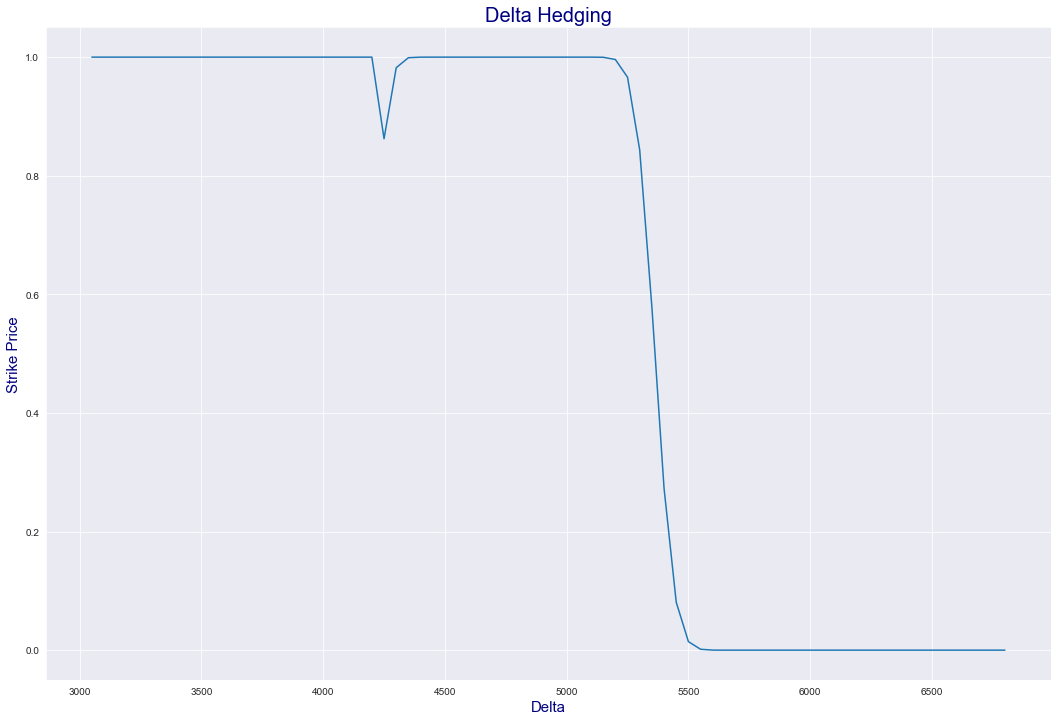

In [21]:
#______________________________________________Delta Hedging_______________________________________________

K_strike = 3000
K = upper_bound
Delta_call = []
K_list_call = []
for i in range(76): 
    K_strike = K_strike+50 
    delta_c = norm.cdf(((np.log(K_strike/K) + (r+(gspc_volatility**2)/2)*t))/gspc_volatility*math.sqrt(t))
    Delta_call.append(-delta_c)
    K_list_call.append(K_strike)

K_strike= 3000
K = lower_bound
Delta_put = []
K_list_put = []
for i in range(76): 
    K_strike = K_strike + 50
    if K_strike < lower_bound:   
        delta_p = 0
    else: 
        delta_p = -norm.cdf(-((np.log(K_strike/K) + (r+(gspc_volatility**2)/2)*t))/gspc_volatility*math.sqrt(t))
    Delta_put.append(delta_p)
    K_list_put.append(K_strike)
    
K_strike= 3000
K = K_strike
Delta = []
K_list = []
for i in range(76): 
    K_strike = K_strike+50 
    delta_ = 1
    Delta.append(delta_)
    K_list.append(K_strike)

#_____________________________________________Portfolio Hedge Position Calculation___________________________________
    
c =[]
z = []
for i in range(len(K_list_call)) : 
        x = (K_list_call[i] +K_list_put[i] + K_list[i])/3
        y = Delta_call[i]+Delta_put[i]+Delta[i]
        c.append(x)
        z.append(y)
        
#________________________________________Create Data Frame to Store Data____________________________________
        
delta_df = pd.DataFrame(columns = ['Strike Price', 'Short Call','Long Put', 'Underlying'])
delta_df['Strike Price'] = K_list_call
delta_df['Short Call'] = Delta_call
delta_df['Long Put'] = Delta_put
delta_df['Underlying'] = Delta
delta_df['Delta Portfolio'] = z
   
#_____________________________________________Visualisation____________________________________

plt.plot(c, z)
# plt.plot(K_list_call, Delta_call)
plt.title('Delta for portfolio which acts as the same as Delta for DDTPS')
plt.xlabel('Strike price')
plt.ylabel('Delta')
plt.title("Delta Hedging", fontsize = 20, color = "navy")
plt.xlabel("Delta", fontsize = 15, color = "navy")
plt.ylabel("Strike Price", fontsize = 15, color = "navy")
delta_df

##### B
Estimate the P&L distribution for your employer at the maturity of the DDTPS, under different assumptions on the index growth rate and index return volatility. Interpret and critically assess your calculations.

Text(0, 0.5, 'Frequency')

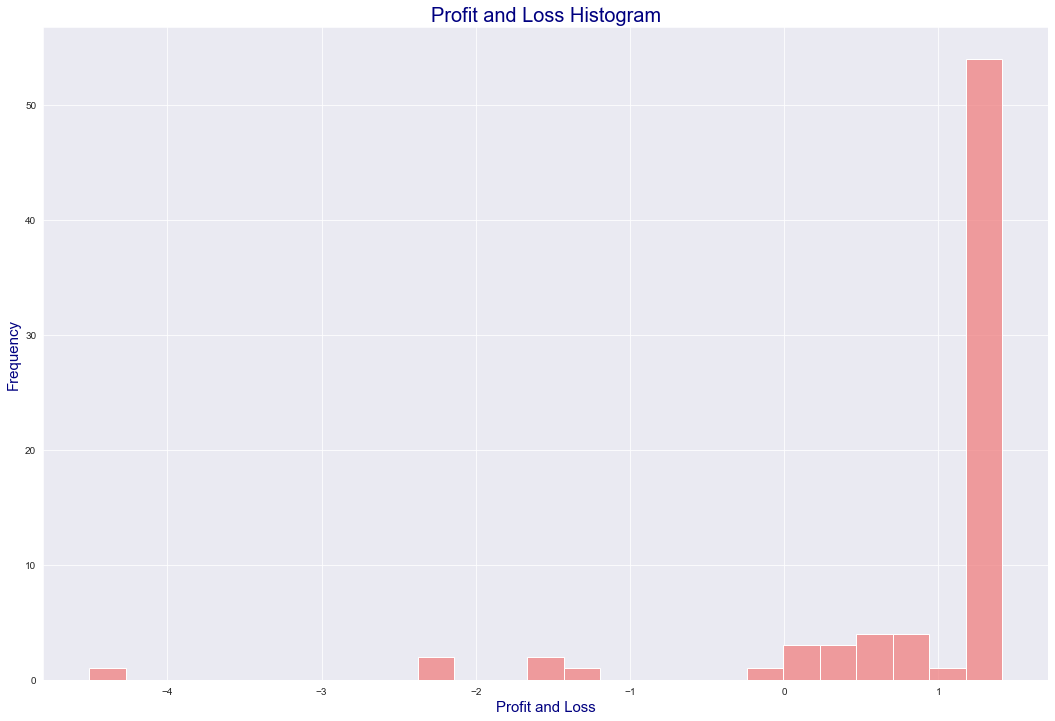

In [25]:

option_list = []
mu = [-0.5, -0.375, -0.25, 0.1, 0.25, 0.375, 0.5]
vol = [0.125, 0.18, 0.25, 0.28, 0.3, 0.31, 0.33]
l = 0
for i, j in zip(mu, vol):
    l = l + 1
    option = pd.DataFrame(columns=["Returns", "Payoff"])
    option["Returns"] = S0 * (1 + norm.rvs(loc=i / 2, scale=j / (2) ** 0.5, size=76))
    option["Payoff"] = option.Returns.apply(lambda f: pricing.DDTPS(S0, f))
    option["Profit"] = option.Payoff - value[0][0]
    option_list.append(option)
    
# print(option_list)

sns.histplot(option.Profit, color = "lightcoral")
plt.title("Profit and Loss Histogram", fontsize = 20, color = "navy")
plt.xlabel("Profit and Loss", fontsize = 15, color = "navy")
plt.ylabel("Frequency", fontsize = 15, color = "navy")

Text(0, 0.5, 'Profit and Loss')

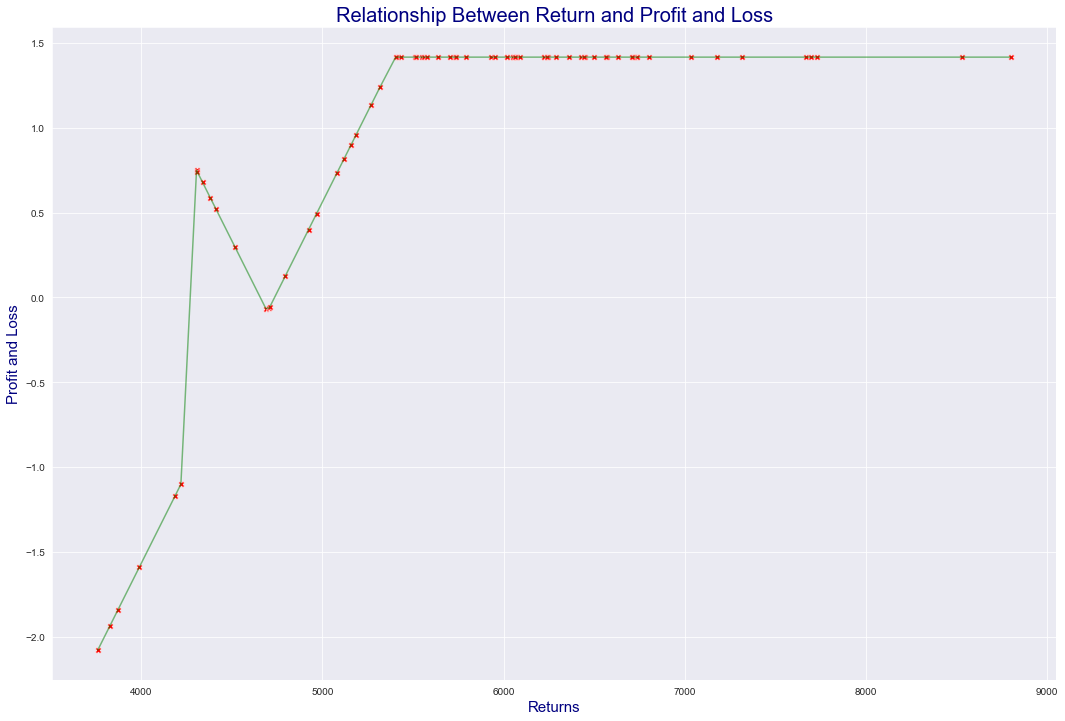

In [73]:
sns.scatterplot(x = option.Returns, y = option.Profit, marker = "X", color = "red")
sns.lineplot(x = option.Returns, y = option.Profit, color = "green", alpha = 0.5)
plt.title("Relationship Between Return and Profit and Loss", fontsize = 20, color = "navy")
plt.xlabel("Returns", fontsize = 15, color = "navy")
plt.ylabel("Profit and Loss", fontsize = 15, color = "navy")

### Reference

https://stackoverflow.com/questions/25692293/inserting-a-link-to-a-webpage-in-an-ipython-notebook

https://www.macroption.com/option-greeks/

https://www.quantconnect.com/tutorials/introduction-to-options/local-volatility-and-stochastic-volatility

https://pypi.org/project/opstrat/

https://medium.datadriveninvestor.com/how-to-delta-hedge-an-option-part-iii-d0a49a28db5b

https://towardsdatascience.com/algorithmic-portfolio-hedging-9e069aafff5a

https://medium.com/swlh/deriving-the-black-scholes-model-5e518c65d0bc

https://medium.datadriveninvestor.com/black-scholes-and-option-greeks-in-python-6038f184801e

https://www.investopedia.com/terms/i/iv.asphttps://www.investopedia.com/terms/i/iv.asp

https://www.pricederivatives.com/en/simple-example-simulation-of-delta-hedging-with-python/

https://analystprep.com/study-notes/frm/part-1/valuation-and-risk-management/binomial-trees/https://analystprep.com/study-notes/frm/part-1/valuation-and-risk-management/binomial-trees/

https://medium.datadriveninvestor.com/how-to-delta-hedge-an-option-part-i-2efc91b24400

https://medium.datadriveninvestor.com/how-to-delta-hedge-an-option-part-ii-519e2c120dcb

https://medium.datadriveninvestor.com/how-to-delta-hedge-an-option-part-v-56c07dea0499

https://www.investopedia.com/ask/answers/040315/how-can-you-use-delta-determine-how-hedge-options.asp

https://medium.datadriveninvestor.com/how-to-delta-hedge-an-option-part-iv-526cebfbc3be

### DDTPS

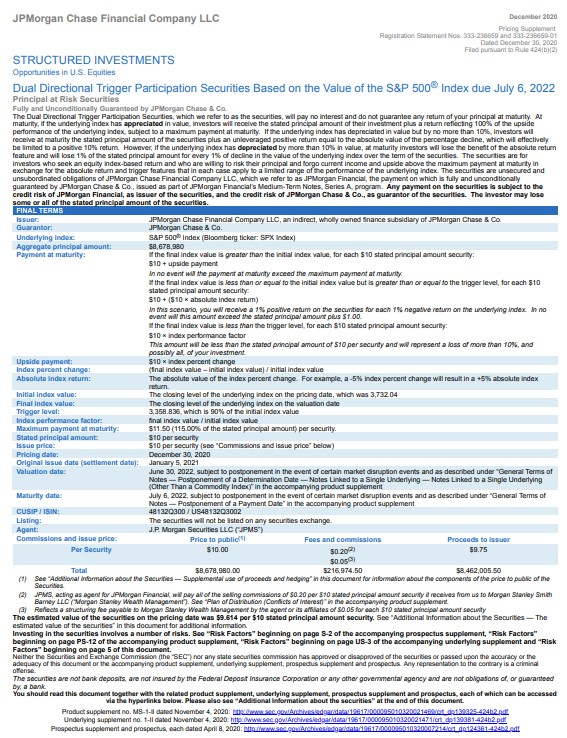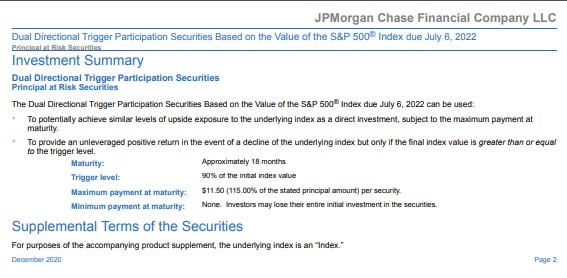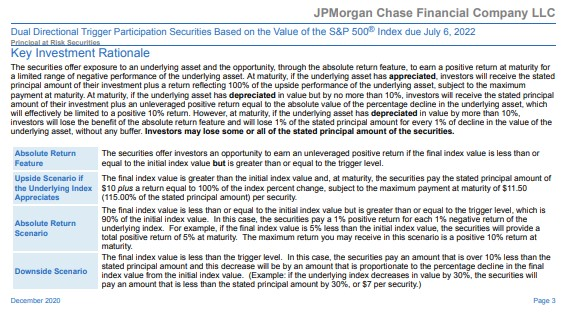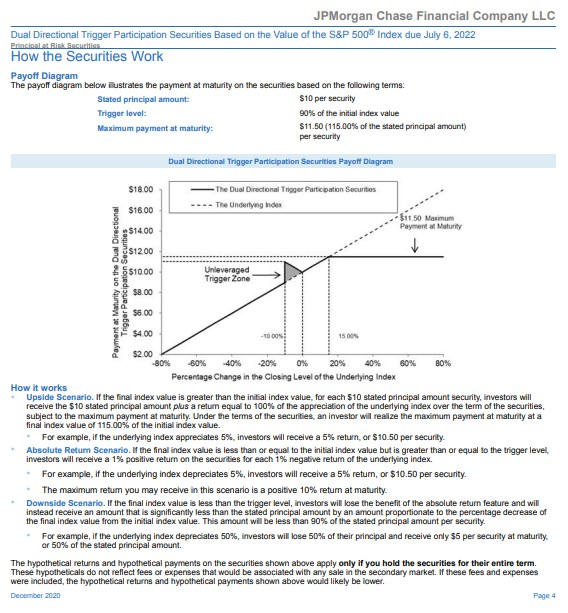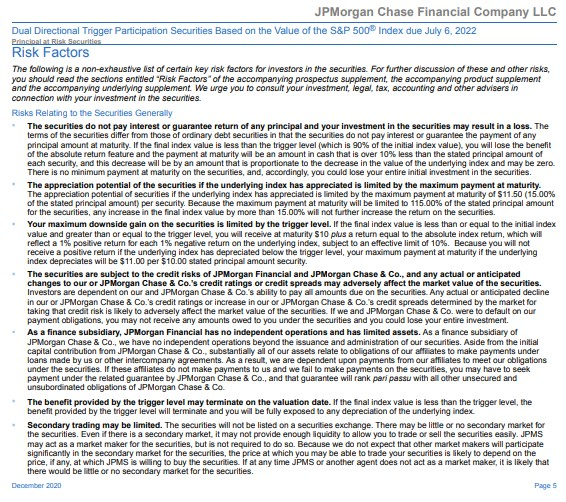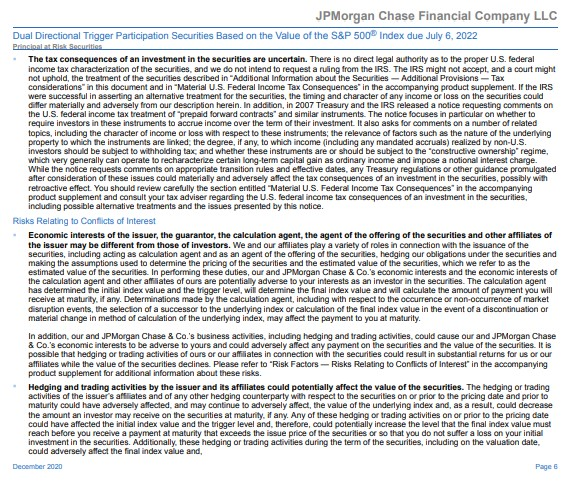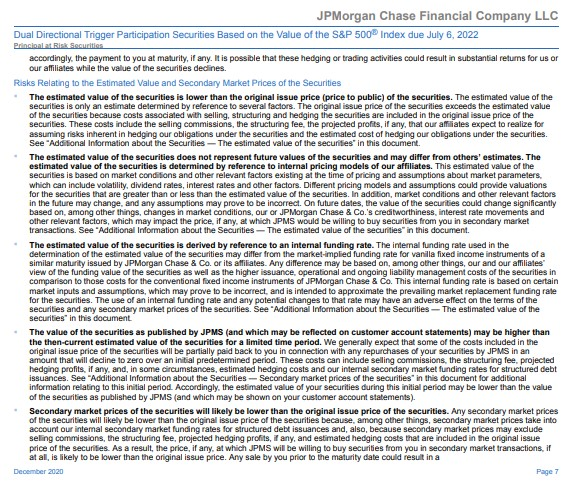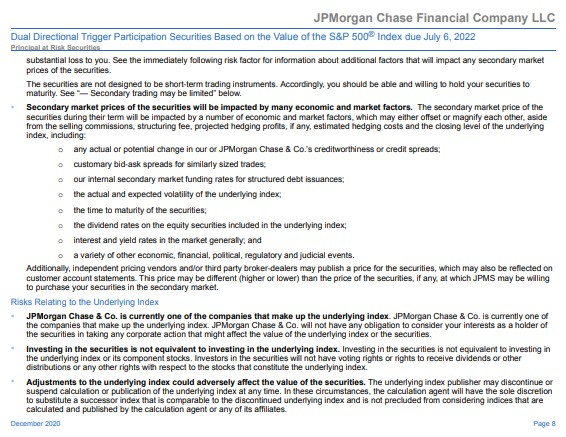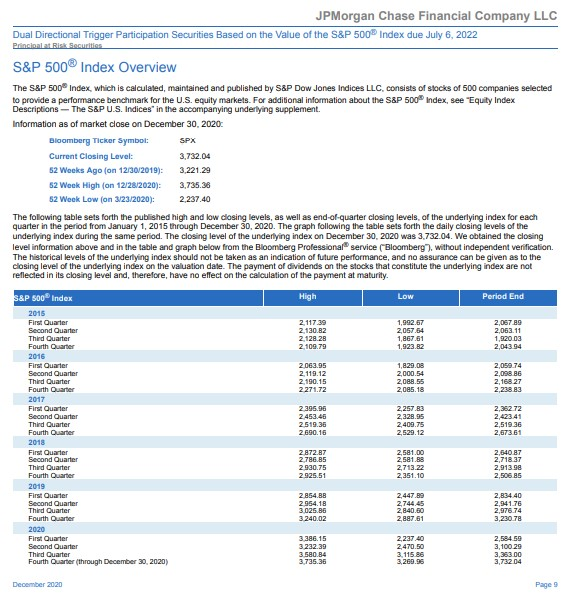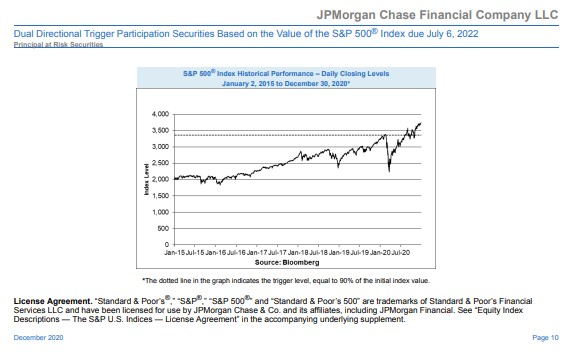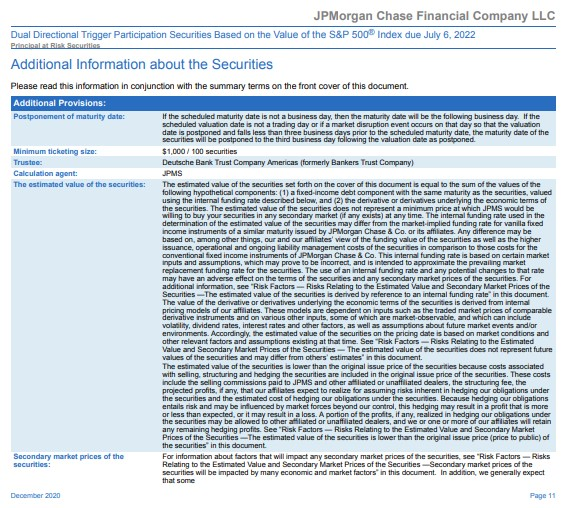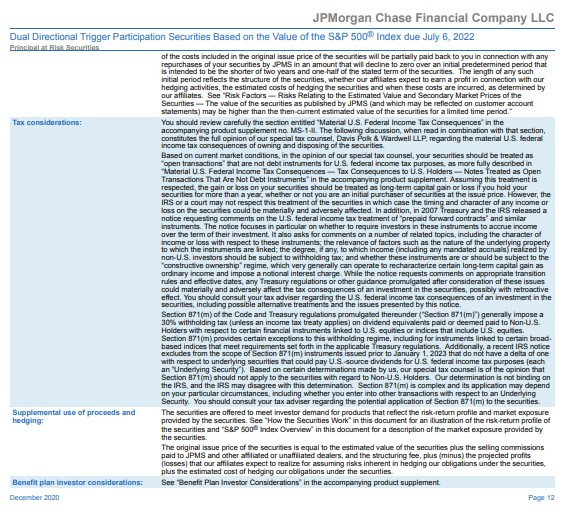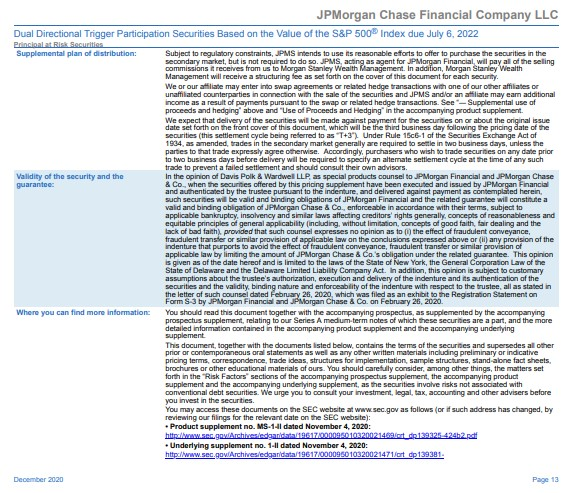